In [60]:
#  kmeans on sales data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans




In [61]:

df = pd.read_csv('sales_data_sample.csv')

In [62]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [64]:
to_drop = ['ORDERNUMBER','PHONE','ADDRESSLINE1','ADDRESSLINE2','STATE','POSTALCODE'  , 'ORDERDATE' , 'CUSTOMERNAME' ,
                'COUNTRY' , 'TERRITORY' , 'CONTACTLASTNAME'   ] 
# to_drop = ['ORDERNUMBER','PHONE','ADDRESSLINE1','ADDRESSLINE2','STATE','POSTALCODE' , 'ORDERLINENUMBER' , 'ORDERDATE' , 'CUSTOMERNAME' ,
#                 'COUNTRY' , 'TERRITORY' , 'CONTACTLASTNAME' , 'CONTACTFIRSTNAME' , 'PRODUCTCODE' , 'CITY'] 
df = df.drop(to_drop, axis=1)

In [65]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
for i in df.columns:
    if df[i].dtype == 'object':
        df[i]= le.fit_transform(df[i])

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   QUANTITYORDERED   2823 non-null   int64  
 1   PRICEEACH         2823 non-null   float64
 2   ORDERLINENUMBER   2823 non-null   int64  
 3   SALES             2823 non-null   float64
 4   STATUS            2823 non-null   int32  
 5   QTR_ID            2823 non-null   int64  
 6   MONTH_ID          2823 non-null   int64  
 7   YEAR_ID           2823 non-null   int64  
 8   PRODUCTLINE       2823 non-null   int32  
 9   MSRP              2823 non-null   int64  
 10  PRODUCTCODE       2823 non-null   int32  
 11  CITY              2823 non-null   int32  
 12  CONTACTFIRSTNAME  2823 non-null   int32  
 13  DEALSIZE          2823 non-null   int32  
dtypes: float64(2), int32(6), int64(6)
memory usage: 242.7 KB


In [67]:
df.sample(5)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CITY,CONTACTFIRSTNAME,DEALSIZE
1909,31,53.92,9,1671.52,5,3,9,2004,6,65,73,41,48,2
204,42,64.00,8,2688.00,5,4,11,2004,0,207,7,65,29,2
1757,40,65.08,2,2603.20,5,3,7,2004,2,68,67,7,2,2
1989,21,100.00,1,3135.93,5,4,11,2004,0,140,76,54,58,1
336,26,100.00,10,4408.56,5,4,12,2004,0,173,12,42,27,1


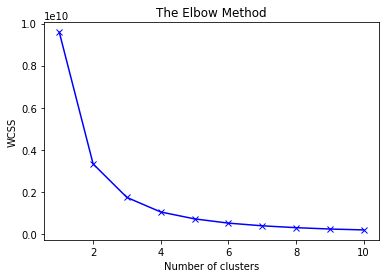

In [68]:
#  Elbow method to find the optimal number of clusters

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',   # init = 'k-means++' is used to avoid random initialization trap
                    max_iter = 300, n_init = 10, random_state = 0) 
# n_init = 10 is used to run the algorithm 10 times with different initial centroids to choose the
#        final model as the one with the lowest SSE (Sum of Squared Errors)
# max_iter = 300 is used to set the maximum number of iterations for each single run

    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss , 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [69]:
k_means = KMeans(n_clusters=3, random_state=0)

k_means.fit(df)


KMeans(n_clusters=3, random_state=0)

<AxesSubplot:xlabel='SALES', ylabel='PRODUCTCODE'>

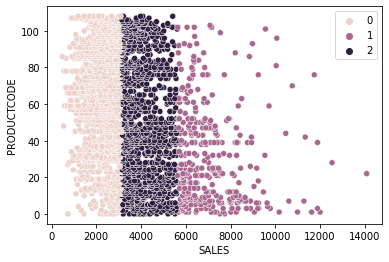

In [70]:
from collections import Counter

Counter(k_means.labels_)

sns.scatterplot(x=df['SALES'], y=df["PRODUCTCODE"], hue=k_means.labels_)